### Augmenting House Data

In [1]:
## Required Libraries

import pandas as pd
import numpy as np
from datetime import datetime, timedelta

In [2]:
## sample dataset

df = pd.DataFrame({
        'household_id':[1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
        'surface_type':['Wood', 'Tile', 'Carpet', 'Tile', 'Concrete', 'Wood', 'Tile', 'Carpet', 'Concrete', 'Wood'],
        'room_size':[30, 25, 20, 22, 35, 28, 24, 18, 40, 30],
        'dirtiness_level':[2, 3, 4, 1, 5, 2, 3, 4, 1, 5],
        'cleaning_time':[25, 20, 30, 15, 28, 23, 18, 32, 14, 27],
        'cleaning_efficiency':[1.20, 1.25, 0.67, 1.47, 1.25, 1.10, 1.30, 0.75, 1.60, 1.15],
        'date_time':[
        '2023-07-20 09:30:00', '2023-07-20 10:15:00', '2023-07-20 11:00:00',
        '2023-07-21 12:30:00', '2023-07-21 13:45:00', '2023-07-22 14:15:00',
        '2023-07-22 15:00:00', '2023-07-23 09:45:00', '2023-07-23 10:30:00',
        '2023-07-24 11:15:00'
    ],
})



In [3]:
df

,household_id,surface_type,room_size,dirtiness_level,cleaning_time,cleaning_efficiency,date_time
0,1,Wood,30,2,25,1.20,2023-07-20 09:30:00
1,2,Tile,25,3,20,1.25,2023-07-20 10:15:00
2,3,Carpet,20,4,30,0.67,2023-07-20 11:00:00
3,4,Tile,22,1,15,1.47,2023-07-21 12:30:00
4,5,Concrete,35,5,28,1.25,2023-07-21 13:45:00
5,6,Wood,28,2,23,1.10,2023-07-22 14:15:00
6,7,Tile,24,3,18,1.30,2023-07-22 15:00:00
7,8,Carpet,18,4,32,0.75,2023-07-23 09:45:00
8,9,Concrete,40,1,14,1.60,2023-07-23 10:30:00
9,10,Wood,30,5,27,1.15,2023-07-24 11:15:00


In [4]:
# meta-data for the given dataframe..
from sdv.metadata import SingleTableMetadata

metadata = SingleTableMetadata()
metadata.detect_from_dataframe(df)

In [5]:
metadata.columns

{'household_id': {'sdtype': 'id'},
 'surface_type': {'sdtype': 'unknown', 'pii': True},
 'room_size': {'sdtype': 'numerical'},
 'dirtiness_level': {'sdtype': 'numerical'},
 'cleaning_time': {'sdtype': 'unknown', 'pii': True},
 'cleaning_efficiency': {'sdtype': 'numerical'},
 'date_time': {'sdtype': 'datetime', 'datetime_format': '%Y-%m-%d %H:%M:%S'}}

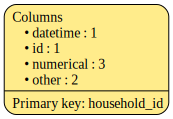

In [6]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png',
)

In [7]:
metadata.update_column(
    column_name='surface_type',
    sdtype='categorical',
)
metadata.update_column(
    column_name='cleaning_time',
    sdtype='numerical',
)

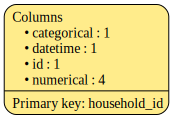

In [8]:
metadata.visualize(
    show_table_details='summarized',
    output_filepath='my_metadata.png',
)

In [9]:
metadata.validate()

### Synthesizing Data

In [10]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(df)

synthetic_data = synthesizer.sample(num_rows=5000)

In [11]:
synthetic_data

,household_id,surface_type,room_size,dirtiness_level,cleaning_time,cleaning_efficiency,date_time
0,0,Tile,33,3,17,1.41,2023-07-23 21:01:08
1,1,Carpet,23,4,23,1.11,2023-07-21 16:05:03
2,2,Carpet,30,2,17,1.26,2023-07-21 10:44:45
3,3,Tile,27,2,26,1.31,2023-07-20 22:35:36
4,4,Carpet,40,1,15,1.58,2023-07-21 15:24:15
...,...,...,...,...,...,...,...
4995,4995,Carpet,40,4,18,1.59,2023-07-23 07:56:36
4996,4996,Wood,29,2,17,1.41,2023-07-23 09:31:37
4997,4997,Wood,27,3,22,0.91,2023-07-20 19:22:22
4998,4998,Concrete,22,5,29,0.74,2023-07-21 03:34:06


In [18]:
synthetic_data.to_csv('house_synthetic_data.csv',index=False)

In [20]:
cdf = pd.read_csv('house_synthetic_data.csv')

cdf

,household_id,surface_type,room_size,dirtiness_level,cleaning_time,cleaning_efficiency,date_time
0,0,Tile,33,3,17,1.41,2023-07-23 21:01:08
1,1,Carpet,23,4,23,1.11,2023-07-21 16:05:03
2,2,Carpet,30,2,17,1.26,2023-07-21 10:44:45
3,3,Tile,27,2,26,1.31,2023-07-20 22:35:36
4,4,Carpet,40,1,15,1.58,2023-07-21 15:24:15
...,...,...,...,...,...,...,...
4995,4995,Carpet,40,4,18,1.59,2023-07-23 07:56:36
4996,4996,Wood,29,2,17,1.41,2023-07-23 09:31:37
4997,4997,Wood,27,3,22,0.91,2023-07-20 19:22:22
4998,4998,Concrete,22,5,29,0.74,2023-07-21 03:34:06
